In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

ratings_path = "Data/ml-latest-small/ratings.csv"
movies_path = "Data/ml-latest-small/movies.csv"

movies = pd.read_csv(movies_path, usecols=['movieId', 'title'], dtype={'movieId': 'int32', 'title': 'str'})
ratings = pd.read_csv(ratings_path)
ratings = ratings.drop(columns='timestamp')

In [2]:
movie_features = ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [3]:
ratings_cnt_tmp = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])

In [4]:
ratings_cnt_tmp['log_count'] = np.log(ratings_cnt_tmp['count'])
ratings_cnt_tmp

,count,log_count
rating,,
0.5,1370,7.222566
1.0,2811,7.941296
1.5,1791,7.490529
2.0,7551,8.929435
2.5,5550,8.621553
3.0,20047,9.905835
3.5,13136,9.483112
4.0,26818,10.196829
4.5,8551,9.053804


Text(0, 0.5, 'number of ratings')

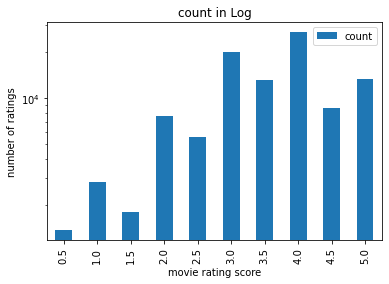

In [5]:
# inspiration from: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
ax = ratings_cnt_tmp['count'].reset_index().plot(
    x='rating',
    y='count',
    kind='bar',
    title='count in Log',
    logy=True,
)
ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [6]:
# how many times each movie has been rated.
movies_cnt = pd.DataFrame(ratings.groupby('movieId').size(), columns=['count'])
movies_cnt_thres = movies_cnt[movies_cnt['count'] >= 55]
#print(movies_cnt_thres)

#print(popular_movies)
df_ratings_drop_movies = ratings[ratings.movieId.isin(movies_cnt_thres.index)]
#print(movies_cnt_thres.index)

# no. of ratings given by each user
users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
users_cnt_thres = users_cnt[users_cnt['count'] >= 55]
ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(users_cnt_thres.index)]
movie_matrice = ratings_drop_users.pivot(index='movieId', columns='userId', values='rating').fillna(0)
movie_matrice

userId,1,4,6,7,15,16,17,18,19,20,...,599,600,601,602,603,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,2.5,0.0,4.5,3.5,4.0,0.0,...,3.0,2.5,4.0,0.0,4.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,2.5,4.0,0.0,4.0,0.0,3.5,0.0,0.0,2.0,0.0
6,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.5,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,5.0
10,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,3.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0
11,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,3.0,0.0,0.0,2.5,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89745,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,...,3.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0
91529,0.0,0.0,0.0,0.0,2.0,4.5,0.0,4.0,0.0,0.0,...,3.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,4.5
99114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,...,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5


In [7]:
movie_csr = csr_matrix(movie_matrice.values)
#print(movie_csr)

In [8]:
# inspiration from: https://stackoverflow.com/questions/522563/accessing-the-index-in-for-loops
# inspiration from: https://stackoverflow.com/questions/43203215/map-unique-strings-to-integers-in-python
# inspiration from: https://stackoverflow.com/questions/48094687/how-to-create-a-value-index-dict-from-a-python-list
movies_id_df = movies.set_index('movieId')
movie_lst = list(movies_id_df.loc[movie_matrice.index].title)
mapp = dict(map(lambda t: (t[1], t[0]), enumerate(movie_lst)))
#mapp

In [9]:
# from: https://stackoverflow.com/questions/50861237/is-there-an-alternative-to-difflib-get-close-matches-that-returns-indexes-l
from difflib import SequenceMatcher
from heapq import nlargest as _nlargest

def get_close_matches_indexes(word, possibilities, n=1, cutoff=0.6):
    if not n >  0:
        raise ValueError("n must be > 0: %r" % (n,))
    if not 0.0 <= cutoff <= 1.0:
        raise ValueError("cutoff must be in [0.0, 1.0]: %r" % (cutoff,))
    result = []
    s = SequenceMatcher()
    s.set_seq2(word)
    for idx, x in enumerate(possibilities):
        s.set_seq1(x)
        if s.real_quick_ratio() >= cutoff and s.quick_ratio() >= cutoff and s.ratio() >= cutoff:
            result.append((s.ratio(), idx))

    # Move the best scorers to head of list
    result = _nlargest(n, result)

    # Strip scores for the best n matches
    return [x for score, x in result]


In [10]:
def recommendations(data, model, mapp, rec, movie):
    model.fit(data) # fit the data
    ind = get_close_matches_indexes(movie, mapp) # getting the indexes for the movie in the map.
    if not (get_close_matches_indexes(movie, mapp)):
        return print('Movie not in the current database. Try another one!')
    else:
        ind = get_close_matches_indexes(movie, mapp)[0]
        
    distances, indices = model.kneighbors(data[ind], n_neighbors=rec+1)
    
    # inspiration from: https://stackoverflow.com/questions/43698531/sorting-a-zipped-object-in-pytshon-3
    # from: https://stackoverflow.com/questions/39781628/numpy-array-to-list-conversion 
    indices_sqz = indices.squeeze().tolist()
    distances_sqz = distances.squeeze().tolist()
    lst_ind_dist = list(zip(indices_sqz,distances_sqz))
    dist_ind_tuples = sorted(lst_ind_dist,key=lambda s: s[1])[:0:-1] # sort based on distances. 
    # reversing the map
    # inspiration from: https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping
    mapper_reversed = dict((v, k) for k, v in mapp.items())
    # printing recommendations
    # inspiration from: https://pyformat.info/
    print('Movie:', movie)
    for i, (ind, dist) in enumerate(dist_ind_tuples):
        print('{0}: {1}'.format(i+1, mapper_reversed[ind]))

In [11]:
mv = 'Batman Begins'
model = NearestNeighbors(metric='cosine',n_neighbors=10)
recommendations(movie_csr,model, mapp,30,mv)

Movie: Batman Begins
1: Finding Nemo (2003)
2: Spider-Man 2 (2004)
3: Bourne Ultimatum, The (2007)
4: Bourne Supremacy, The (2004)
5: Matrix, The (1999)
6: Memento (2000)
7: Monsters, Inc. (2001)
8: Minority Report (2002)
9: Spider-Man (2002)
10: X2: X-Men United (2003)
11: Casino Royale (2006)
12: Donnie Darko (2001)
13: Bourne Identity, The (2002)
14: Prestige, The (2006)
15: Pirates of the Caribbean: Dead Man's Chest (2006)
16: Iron Man (2008)
17: 300 (2007)
18: Fight Club (1999)
19: Kill Bill: Vol. 2 (2004)
20: Departed, The (2006)
21: Sin City (2005)
22: Incredibles, The (2004)
23: Lord of the Rings: The Fellowship of the Ring, The (2001)
24: Matrix Reloaded, The (2003)
25: V for Vendetta (2006)
26: Kill Bill: Vol. 1 (2003)
27: Dark Knight, The (2008)
28: Lord of the Rings: The Two Towers, The (2002)
29: Pirates of the Caribbean: The Curse of the Black Pearl (2003)
30: Lord of the Rings: The Return of the King, The (2003)
